In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import tensorflow as tf

In [8]:
%matplotlib inline

In [3]:
# functions for printing out output
def TRAIN_SIZE(num):
    print("Total Training Images in Dataset = " + str(mnistData.train.images.shape))
    print("--------------------------------------------------")
    xTrain = mnistData.train.images[:num, :]
    print("xTrain Examples Loaded = " + str(xTrain.shape))
    yTrain = mnistData.train.labels[:num, :]
    print("yTrain Examples Loaded = " + str(yTrain.shape))
    print("")
    return xTrain, yTrain

def TEST_SIZE(num):
    print("Total Test Images in Dataset = " + str(mnistData.test.images.shape))
    print("--------------------------------------------------")
    xTest = mnistData.test.images[:num, :]
    print("xTest Examples Loaded = " + str(xTest.shape))
    yTest = mnistData.test.labels[:num, :]
    print("yTest Examples Loaded = " + str(yTest.shape))
    print("")
    return xTest, yTest

In [4]:
def displayDigit(num):
    print(yTrain[num])
    label = yTrain[num].argmax(axis = 0)
    image = xTrain[num].reshape([28, 28])
    plt.title("Example: %d  Label: %d" % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()


def displayMultFlat(start, stop):
    images = xTrain[start].reshape([1, 784])
    for i in range(start + 1, stop):
        images = np.concatenate((images, xTrain[i].reshape([1, 784])))

    xTrain[i].reshape([1, 784])
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [6]:
# Input the data
mnistData = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz


Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [7]:
# Meaning: each example is a 28x28 pixel image flattened in an array with 
# 784 values representing each pixel's intensity.
#  The xTrain variable is a 55,000 row and 784 column matrix.

# yTrain data are associated labels for the xTrain examples. Labels are stored
# as an 1x10 binary array, one-hot encoding for the represented digit. 
xTrain, yTrain = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
xTrain Examples Loaded = (55000, 784)
yTrain Examples Loaded = (55000, 10)



[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


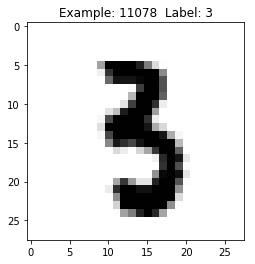

In [14]:
displayDigit(rd.randint(0, xTrain.shape[0])) # rand number from 0 to 55,000

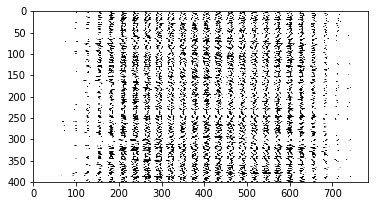

In [19]:
# This is what multiple training examples look like to the classifier
# in their flattened form. Classifier sees values from 0 to 1 that
# represent pixel intensity. 

displayMultFlat(0, 400)

In [24]:
# Tensorflow creates a directed acyclic graph (flow chart) which we will 
# run in the session
sess = tf.Session()
sess

In [23]:
# Placeholder is fed data, need to match its shape and type. 
x = tf.placeholder(tf.float32, shape=[None, 784])
x

# NOTE: our placeholder can be fed any 784-sized array values.

<tf.Tensor 'Placeholder_2:0' shape=(?, 784) dtype=float32>

In [25]:
# Define the y-placeholder to feed yTrain into. Used later to compare
# the targets to the predictions
# Labels are classes
y = tf.placeholder(tf.float32, shape=[None, 10])

In [28]:
# The W and b are values that the network will learn. 
# Variable because these values change.
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [29]:
W

<tf.Variable 'Variable_3:0' shape=(784, 10) dtype=float32_ref>

In [30]:
b

<tf.Variable 'Variable_4:0' shape=(10,) dtype=float32_ref>

In [32]:
# Define the classifier function

# NOTE:
# x = m x 1 vector, so there are R = m input elements
# W = 1 x n = S x R so there are S = 1 neuron and R = 
f = tf.nn.softmax(tf.matmul(x, W) + b)
f

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [34]:
# Must run the session and feed the graph data while in the session
# to see the values of the function. 
xTrain, yTrain = TRAIN_SIZE(3) # feed in 3 examples and see what it predicts
sess.run(tf.global_variables_initializer())

print(sess.run(f, feed_dict = {x: xTrain}))

# These are predictions for the first three training examples. 
# Outputs equal 10% probability of our training examples for each class.

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
xTrain Examples Loaded = (3, 784)
yTrain Examples Loaded = (3, 10)



[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


In [36]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2]))) # applies softmax over each const.

array([0.11634309, 0.10579926, 0.7778576 ], dtype=float32)

In [52]:
# Calculate accuracy by comparing true values from yTrain to the results
# of the prediction function 'f' for each example. 

crossEntropyLoss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(f), reduction_indices=[1]))
print(crossEntropyLoss)

# This is taking the log of all our predictions 'f' (whose values range from 0 to 1)
# and element-wise multiplying by the example's true value 'y', the target. 
# If the log function for each value is close to zero it will make the value a large number
# and if it is close to 1 it will make the value a small negative number (because that is
# how the -log(x) function works)

# Meaning: penalize classifier with large number if prediction is incorrect and with 
# small number if the prediction is correct.

Tensor("Mean_2:0", shape=(), dtype=float32)


In [53]:
# Mini-example of softmax prediction that is confident of digit being 3: 
j = [0.03, 0.03, 0.01, 0.9, 0.1, 0.01, 0.0025, 0.0025, 0.0025, 0.0025]
k = [0,0,0,1,0,0,0,0,0,0]

In [54]:
-np.log(j)

array([3.5065579 , 3.5065579 , 4.60517019, 0.10536052, 2.30258509,
       4.60517019, 5.99146455, 5.99146455, 5.99146455, 5.99146455])

In [46]:
np.sum(-np.multiply(np.log(j), k)) # # when predicting 3 for target = 3 then we get low loss

0.10536051565782628

In [55]:
# When making prediction of 3 when actual target = 2
k = [0,0,1,0,0,0,0,0,0,0]
np.sum(-np.multiply(np.log(j), k)) # then we get a high loss

4.605170185988091

In [56]:
# Next step: training the classifier involves finding good values for W and b
# such that we get lowest possible loss. 
xTrain, yTrain = TRAIN_SIZE(5500)
xTest, yTest = TEST_SIZE(10000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
xTrain Examples Loaded = (5500, 784)
yTrain Examples Loaded = (5500, 10)

Total Test Images in Dataset = (10000, 784)
--------------------------------------------------
xTest Examples Loaded = (10000, 784)
yTest Examples Loaded = (10000, 10)



In [57]:
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500 # setting hyperparameters

In [58]:
# Can now initialize the variables so they can be used be Tensorflow graph:
init = tf.global_variables_initializer()
sess.run(init)

In [60]:
# Train the classifier using gradient descent. 
# The variable 'training' will do the optimization with a LEARNING_RATE to
# minimize the loss function of cross entropy.

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(crossEntropyLoss)
print(training)

name: "GradientDescent_1"
op: "NoOp"
input: "^GradientDescent_1/update_Variable_3/ApplyGradientDescent"
input: "^GradientDescent_1/update_Variable_4/ApplyGradientDescent"



In [61]:
numCorrectPredictions = tf.equal(tf.argmax(f, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(numCorrectPredictions, tf.float32))
print("Num Correct predictions = ", numCorrectPredictions)
print("Accuracy = ", accuracy)

Num Correct predictions =  Tensor("Equal:0", shape=(?,), dtype=bool)
Accuracy =  Tensor("Mean_3:0", shape=(), dtype=float32)


In [63]:
# For each training step, run the training by feeding in values from xTrain and yTrain. 
# To calculate accuracy, run the accuracy function in tensorflow to classify the unseen data
# in xTest by comparing its f output and yTest targets. 
for i in range(TRAIN_STEPS + 1):
    sess.run(training, feed_dict={x:xTrain, y:yTrain})
    
    if i % 100 == 0:
        print("Training step: " + str(i) + 
              "\nAccuracy = " + str(sess.run(accuracy, feed_dict={x:xTest, y:yTest})) + 
              "\nLoss = " + str(sess.run(crossEntropyLoss, {x:xTrain, y:yTrain})))

Training step: 0
Accuracy = 0.8983
Loss = 0.33189422


Training step: 100
Accuracy = 0.8994
Loss = 0.32079706


Training step: 200
Accuracy = 0.9003
Loss = 0.31141436


Training step: 300
Accuracy = 0.901
Loss = 0.30329886


Training step: 400
Accuracy = 0.902
Loss = 0.29615584


Training step: 500
Accuracy = 0.903
Loss = 0.28978086


Training step: 600
Accuracy = 0.9034
Loss = 0.28402764


Training step: 700
Accuracy = 0.904
Loss = 0.27878776


Training step: 800
Accuracy = 0.9047
Loss = 0.2739786


Training step: 900
Accuracy = 0.9057
Loss = 0.26953605


Training step: 1000
Accuracy = 0.9061
Loss = 0.26540893


Training step: 1100
Accuracy = 0.906
Loss = 0.26155657


Training step: 1200
Accuracy = 0.9061
Loss = 0.2579453


Training step: 1300
Accuracy = 0.9064
Loss = 0.25454745


Training step: 1400
Accuracy = 0.907
Loss = 0.25133985


Training step: 1500
Accuracy = 0.9074
Loss = 0.24830239


Training step: 1600
Accuracy = 0.9072
Loss = 0.24541877


Training step: 1700
Accuracy = 0.9066
Loss = 0.24267438


Training step: 1800
Accuracy = 0.9066
Loss = 0.24005653


Training step: 1900
Accuracy = 0.9067
Loss = 0.23755442


Training step: 2000
Accuracy = 0.9065
Loss = 0.2351587


Training step: 2100
Accuracy = 0.9059
Loss = 0.23286042


Training step: 2200
Accuracy = 0.9061
Loss = 0.23065226


Training step: 2300
Accuracy = 0.9058
Loss = 0.22852787


Training step: 2400
Accuracy = 0.9057
Loss = 0.2264811


Training step: 2500
Accuracy = 0.9056
Loss = 0.22450635


In [ ]:
# NOTE: sign of overfitting when accuracy goes down then back up while loss still decreases
# (WHY?)

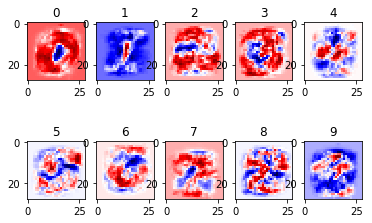

In [68]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(True)
    frame1.axes.get_yaxis().set_visible(True)
    
plt.show()

# NOTE: this is a diagram of the weights ???
# NOTE: red = good, white = neutral, blue = miss in prediction classification.

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
xTrain Examples Loaded = (1, 784)
yTrain Examples Loaded = (1, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


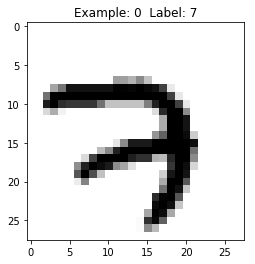

In [69]:
# Apply the cheat sheet to one example
xTrain, yTrain = TRAIN_SIZE(1)
displayDigit(0)

In [70]:
# Look at the predictor 'f'
answer = sess.run(f, feed_dict={x:xTrain})
print(answer) # each col contains a probability, 1x10 matrix

[[1.2636233e-05 8.8356910e-06 8.7598033e-02 1.9629469e-02 5.7162094e-04
  8.4997137e-06 1.9785772e-05 8.6006653e-01 6.2712841e-03 2.5813211e-02]]


In [71]:
# This returns position of highest value, which gives us the prediction
answer.argmax()

7

In [91]:
# Going to make predictions on a random digit
def displayCompare(num):
    # load one training sample
    xTrain = mnistData.train.images[num, :].reshape(1, 784)
    yTrain = mnistData.train.labels[num, :]
    
    # Get the label as an integer
    label = yTrain.argmax()
    print("Label = ", label)
    
    # Get the prediction as an integer
    prediction = sess.run(f, feed_dict={x:xTrain}).argmax()
    print("Prediction = ", prediction)
    
    #plt.title("Prediction: %d Label: %d" %(prediction, label))
    
    plt.imshow(xTrain.reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
    
    plt.show()

Label =  4
Prediction =  9


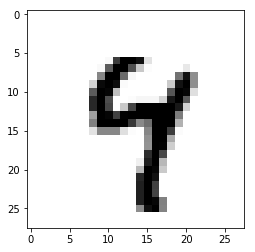

In [93]:
displayCompare(rd.random(0, 55000))